## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Name Surname : Ezgi Ekin 
###  Student ID : 2210356029

## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Our task involves building a perceptron model to classify banknote authenticity based on specific feature data. The perceptron algorithm will be trained to distinguish between genuine and counterfeit banknotes by learning patterns from the dataset.
* The Banknote Authentication dataset,contains four features derived from wavelet-transformed images of banknotes: variance, skewness, curtosis, and entropy. The dataset has a binary target variable indicating authenticity, where 0 represents fake banknotes and 1 represents authentic ones.

In [873]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [874]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
# Features and target variables
features = banknote_authentication.data.features 
target = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [875]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

dataArray = np.hstack((features,target))
columnNames = ['variance','skewness','curtosis','entropy','class']
dataframe = pd.DataFrame(dataArray, columns=columnNames)
dataframe.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


In [876]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.
print("\nSummary statistics:")
print('Shape of the dataset:',features.shape)
dataframe.describe()


Summary statistics:
Shape of the dataset: (1372, 4)


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [877]:
missing_values = dataframe.isnull().sum()
print(missing_values)

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


Missing data points can cause a significant challenge in data analysis and can lead to inaccurate or biased result, so we must check them.
There is no missing value in out dataset so we don't have to handle anything about that, but we must check if there are duplicates in the dataset. 

In [879]:
dataframe.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1367    False
1368    False
1369    False
1370    False
1371    False
Length: 1372, dtype: bool

Duplicate records do not add any value or information while using them in a model and would rather slow down the processing. So we must handle them if they exist. But we don't have any in our dataset.

In [881]:
dataframe.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class       float64
dtype: object

It might be useful to see the data types in dataset. Understanding the data types of our variables is crucial for data manipulation and analysis.

In [883]:
# Convert the DataFrame to a Numpy array
whole_array = dataframe.to_numpy()

features_array = dataframe[['variance', 'skewness', 'curtosis', 'entropy']].to_numpy()

target_array = dataframe['class'].to_numpy()

print(whole_array)
print(features_array)
print(target_array)

[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0. 0. 0. ... 1. 1. 1.]


### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

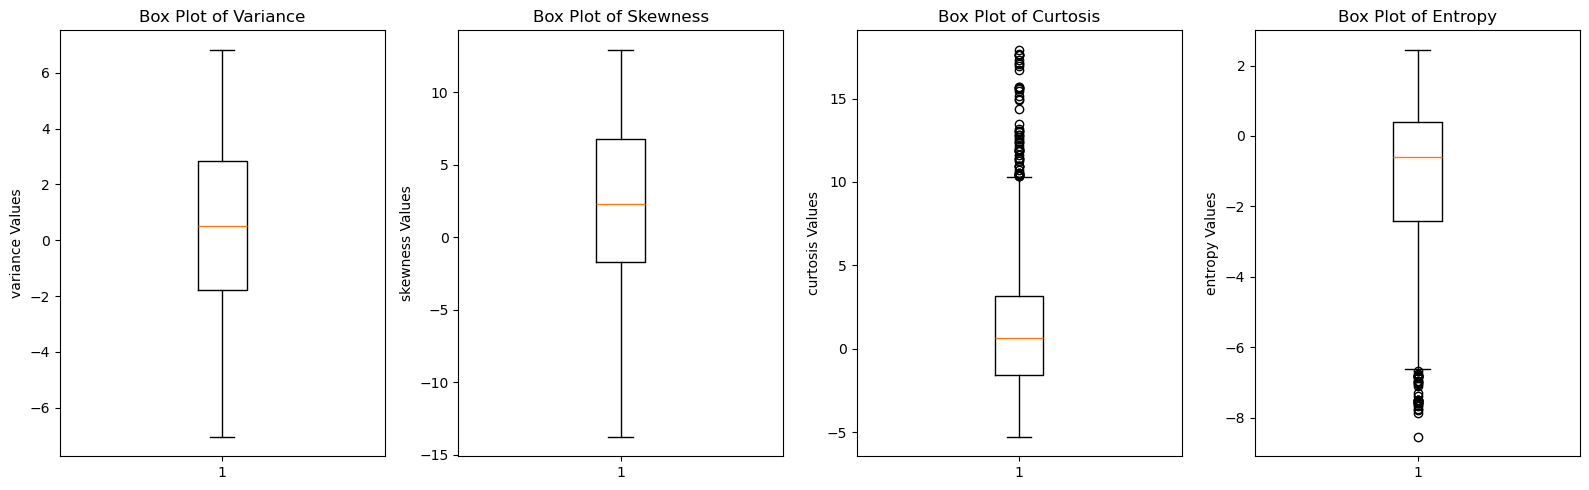

In [886]:
## Analyze the dataset and decide whether scaling is needed. 
## Explain your choices in a brief comment. 

features = ['variance', 'skewness', 'curtosis', 'entropy']  # List of features to analyze
titles = ['Box Plot of Variance', 'Box Plot of Skewness', 'Box Plot of Curtosis', 'Box Plot of Entropy']  # Titles for each plot

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 5))  # Set up 1 row and 4 columns for the box plots

# Loop through each feature to create a box plot
for ax, feature, title in zip(axs, features, titles):
    ax.boxplot(dataframe[feature]) 
    ax.set_title(title)  
    ax.set_ylabel(f'{feature} Values')  

plt.tight_layout()
plt.show()

After examining the box plots of the features variance, skewness, curtosis, and entropy, I observed the following:

1. Outliers: Several features display significant outliers, which can adversely affect model training by distorting weight updates and the overall decision boundary.
2. Feature Ranges: The features have different scales and distributions. This variation can lead to uneven contributions during training

Given these observations, I chose standardization for scaling the features. Here's why:

1. Minimizing Outlier Effects: Standardization normalizes the mean to 0 and the standard deviation to 1, making it less sensitive to outliers compared to other scaling methods like Min-Max scaling, which could compress the data into a limited range and amplify the effect of outliers.
2. Suitable for Linear Models: As the Perceptron algorithm is a linear classifier, having features on a similar scale helps in accurately defining the decision boundary. Also standardization can lead to faster convergence during training.

#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data. 

The validation dataset is used to evaluate a model that has been trained on the training dataset. This process also helps prevent the model from becoming too tailored to the training data, which can lead to overfitting.

2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

Using the training set to evaluate a model can lead to memorization instead of true learning. The model might perform well on the training data but struggle with new data it hasn’t seen before. It can also memorize noise which is irrelevant details that don’t reflect real-world patterns. This creates bias in the evaluation so we must use unseen data to evaluate model.

In [892]:
# Split the dataset into training and testing sets (80% train, 20% test)

def split(x, y, t_percentage):
    indices = np.arange(x.shape[0])  # Create an array of indices based on the number of samples

    np.random.shuffle(indices)  # Shuffle indices to randomize the dataset split
    train_size = int(t_percentage * len(indices))  # Calculate the size of the training set (e.g., 80%)
    train_indices = indices[:train_size]  
    test_indices = indices[train_size:]  
    
    X_train, X_test = x[train_indices], x[test_indices] 
    y_train, y_test = y[train_indices], y[test_indices] 

    return X_train, X_test, y_train, y_test

# Perform the split on the feature and target arrays
X_train, X_test, y_train, y_test = split(features_array, target_array, 0.8)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)


X_train_fisher = X_train  # Save unscaled training data for Fisher's LD
X_test = (X_test - X_train.mean()) / X_train.std()  # Scale test set based on training mean and std
X_train = (X_train - X_train.mean()) / X_train.std()  # Scale train set using its mean and std


Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097,)
Shape of Y_test: (275,)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data.

The perceptron algorithm is designed to classify data by finding a hyperplane that separates two classes, particularly when the dataset exhibits characteristics that are linearly separable. The features in the dataset may be related to each other and to the output classes. For example, skewness indicates the direction of the data distribution, while kurtosis shows how peaked the distribution is. These relationships can help in understanding the underlying structure of the data. If a particular feature (like skewness) is highly relevant for distinguishing between the two classes, the perceptron will adjust its weight accordingly. Since all the features are correlated at some point—especially because they are derived from regression data—the perceptron can effectively adjust the weights. Additionally, the perceptron algorithm is relatively simple and computationally efficient for this kind of problem.

In [896]:
## Implement Perceptron Learning Algorithm
class Perceptron:
    def __init__(self, weight, bias, learning_rate, epoch):
        # Initialize Perceptron parameters
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.epoch = epoch

    def train_model(self, x, y,check):
        rows = x.shape[0]  # Number of samples
        for i in range(self.epoch):  
            missclassified = 0
            for j in range(rows):
                target = -1 if y[j] == 0 else 1  # Convert class 0 to -1 and class 1 to 1
                # Check if prediction matches the target; if not, update weights
                if np.sign(self.weight.dot(x[j]) + self.bias) != target:
                    missclassified += 1
                    self.weight += self.learning_rate * x[j] * target  # Update weights
                    self.bias += self.learning_rate * target  # Update bias

            if check:
                print(f'Epoch {i+1}: Missclassified = {missclassified}')  # Track misclassifications
    
        return self.weight, self.bias

    def predict(self, X):
        output_array = np.zeros((X.shape[0],))  # Initialize predictions array
        
        for i in range(X.shape[0]):
            # Make prediction: 0 for class -1 and 1 for class 1
            output_array[i] = 0 if np.sign(self.weight.dot(X[i]) + self.bias) == -1 else 1  
    
        return output_array

    # Accuracy calculation
    def accuracy_calc(self, X_train, y_train):
        num = 0 
        for i in range(X_train.shape[0]):
            # Make prediction and compare to actual label
            output = 0 if np.sign(self.weight.dot(X_train[i]) + self.bias) == -1 else 1  
            if output == y_train[i]:
                num += 1  # Increment if correct
        accuracy = num / X_train.shape[0]  
      
        return accuracy


Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?

1. A very small learning rate means that weight updates will be minimal. As a result, the model may take a long time to converge, requiring many epochs to reach an optimal solution. And with a large learning rate, the model may skip over the best solutions entirely, failing to find the minimum loss. It leads to divergence, where the loss increases instead of decreasing.
2.  Training for too many epochs can lead to overfitting. As a result, it performs well on training data but poorly on unseen data. If the number of epochs is too low, the model may not have enough opportunities to learn from the data
3. Appropriately chosen learning rate and epoch are the key to achieving a model that generalizes well.

#### Train the Perceptron

In [900]:
## Train the Perceptron model on the training set
init_weight = np.zeros((X_train.shape[1],))  # Initialize weights as zeros with shape matching features
init_bias = 0  # Initialize bias to zero
epoch = 50
learning_rate = 0.01

perceptron = Perceptron(init_weight, init_bias, learning_rate, epoch)

# Train the model and get the final weights and bias
weight, bias = perceptron.train_model(X_train, y_train,True)


Epoch 1: Missclassified = 54
Epoch 2: Missclassified = 31
Epoch 3: Missclassified = 20
Epoch 4: Missclassified = 30
Epoch 5: Missclassified = 32
Epoch 6: Missclassified = 19
Epoch 7: Missclassified = 23
Epoch 8: Missclassified = 17
Epoch 9: Missclassified = 27
Epoch 10: Missclassified = 25
Epoch 11: Missclassified = 30
Epoch 12: Missclassified = 20
Epoch 13: Missclassified = 21
Epoch 14: Missclassified = 21
Epoch 15: Missclassified = 18
Epoch 16: Missclassified = 18
Epoch 17: Missclassified = 20
Epoch 18: Missclassified = 18
Epoch 19: Missclassified = 28
Epoch 20: Missclassified = 20
Epoch 21: Missclassified = 17
Epoch 22: Missclassified = 19
Epoch 23: Missclassified = 22
Epoch 24: Missclassified = 19
Epoch 25: Missclassified = 17
Epoch 26: Missclassified = 23
Epoch 27: Missclassified = 22
Epoch 28: Missclassified = 18
Epoch 29: Missclassified = 16
Epoch 30: Missclassified = 18
Epoch 31: Missclassified = 18
Epoch 32: Missclassified = 16
Epoch 33: Missclassified = 20
Epoch 34: Missclass

#### Prediction on Training Data

In [902]:
# Predicting on the training data
output_array = perceptron.predict(X_train)
print('Prediction shape:',output_array.shape)
print('Prediction:',output_array)

print("Training Accuracy:", perceptron.accuracy_calc(X_train,y_train))

Prediction shape: (1097,)
Prediction: [0. 0. 0. ... 0. 1. 0.]
Training Accuracy: 0.9845031905195989


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [905]:
## Evaluate the model's performance on the test set by calculating accuracy.

print("Testing Accuracy:", perceptron.accuracy_calc(X_test,y_test))

Testing Accuracy: 0.9963636363636363


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?

Accuracy measures how often a model correctly classifies examples. High accuracy on both training (98%) and test (98-99%) sets indicates that the model effectively learned the underlying patterns and generalizes well to unseen data. This similarity suggests that the model is not overfitting and is likely to perform reliably on similar real-world datasets.

2. Why is accuracy sometimes not enough, especially in cases where the data is imbalanced? Explain a scenario where a high accuracy might be misleading.

In datasets where one class significantly outnumbers another, a model can achieve high accuracy by simply predicting the majority class. This means that accuracy does not provide information about how well the model is performing for each individual class.

For example, consider a dataset with 8,000 instances of the "True" class and 2,000 instances of the "Not True" class. If a model is trained on this dataset and learns to predict "True" for all instances, it would achieve an 80% accuracy rate (correctly predicting the 8,000 true instances). However, this model would not represent the "Not True" class at all, failing to identify any of the 2,000 instances correctly.

In [910]:
def calculate_metrics(y_true, y_pred):
    # Initialize counters for true positives, true negatives, false positives, and false negatives
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(y_true.shape[0]):
        if y_pred[i] == 1 and y_pred[i] == y_true[i]:  # True Positive
            tp += 1
        elif y_pred[i] == 1 and y_pred[i] != y_true[i]:  # False Positive
            fp += 1
        elif y_pred[i] == 0 and y_pred[i] == y_true[i]:  # True Negative
            tn += 1
        elif y_pred[i] == 0 and y_pred[i] != y_true[i]:  # False Negative
            fn += 1

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fn + fp)  
    precision = tp / (tp + fp)  
    recall = tp / (tp + fn)  
    f1 = 2 * (precision * recall) / (precision + recall)  

    return accuracy, precision, recall, f1

# Calculate and print metrics for the training set
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), perceptron.predict(X_train))

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

print('-------------------------------------')

# Calculate and print metrics for the test set
accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_test.flatten(), perceptron.predict(X_test))

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")


Training Accuracy: 0.9845031905195989
Training Precision: 0.9795918367346939
Training Recall: 0.9856262833675564
Training F1 Score: 0.9825997952917093
-------------------------------------
Test Accuracy: 0.9963636363636363
Test Precision: 1.0
Test Recall: 0.991869918699187
Test F1 Score: 0.9959183673469388


Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.
2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.
3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.
4. What are the limitations of using F1 score alone?

1. Precision is more important than recall in situations where the cost of false positives is high, and it’s critical to ensure that positive predictions are as accurate as possible. A quality control system that only flags a few defective products as faulty (high precision), but many defective products go unnoticed (low recall).The flagged products are genuinely defective, but the overall quality assurance process misses many issues.
2. Recall is more critical in situations where failing to identify true positives can have severe consequences. In screening for serious diseases, high recall is vital to ensure that as many true cases as possible are identified. Missing a diagnosis can lead to delayed treatment and worsen patient outcomes.
3. In many applications, precision and recall are inversely related. Focusing on maximizing one can lead to a decrease in the other. The F1 score provides a single metric that captures this balance. In email spam classification, it is important to both correctly identify spam emails while minimizing false positives (emails falsely flagged as spam).
4. Although the F1 score provides a better balance between precision and recall than accuracy, it can still be sensitive to class imbalance. The F1 score is a composite measure and does not provide direct information about the individual contributions of precision and recall. A high F1 score can be achieved through various combinations of precision and recall, making it less informative. F1 score may not align with business objectives.For example, in medical diagnosis, missing a true positive may have a far greater cost than incorrectly identifying a healthy person as sick.


### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

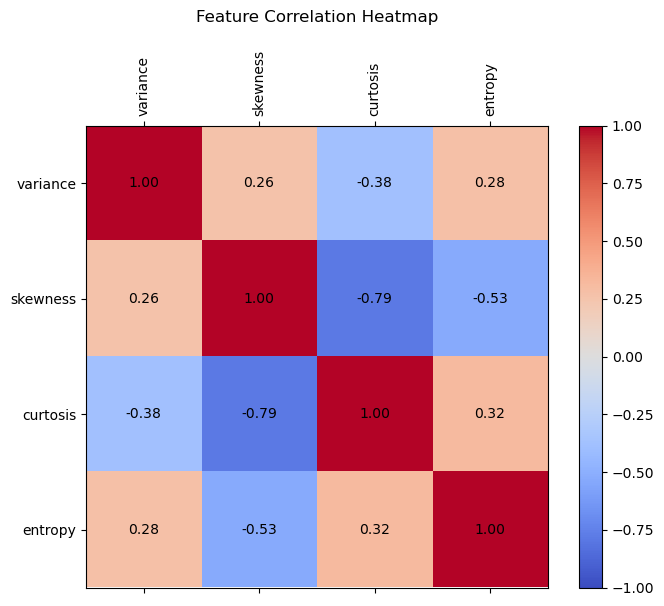

In [916]:
# Compute the correlation matrix for features (excluding the target column 'class')
correlation_matrix = dataframe.drop(columns=['class']).corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(8, 6)) 
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)  # Display the correlation matrix with color range

fig.colorbar(cax)

# Set ticks and labels for each feature
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)  
ax.set_yticklabels(correlation_matrix.columns)

# Annotate each cell with correlation value
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black') 

plt.title('Feature Correlation Heatmap', pad=20) 
plt.show()


3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

I chose Skewness and Curtosis as we can see they are the least correlated ones.

In [919]:
# Select two features based on prior analysis (e.g., low correlation or specific interest)
# Here, selecting features at indices 1 and 2 from the original feature set for visualization

X_train_2D = X_train[:, [1, 2]]  # Create training set with two selected features
X_test_2D = X_test[:, [1, 2]]  # Create test set with the same two selected features

# Split the selected features into training and validation sets if not done yet


#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [922]:
## Train the Perceptron model on the training set with two selected features
init_weight = np.zeros((X_train_2D.shape[1],))  # Initialize weights for 2D input
init_bias = 0 
epoch = 50  
learning_rate = 0.01  

perceptron_2D = Perceptron(init_weight, init_bias, learning_rate, epoch)

# Train the model and retrieve the final weights and bias
vector_2D, bias_2D = perceptron_2D.train_model(X_train_2D, y_train,False)

# Predicting on the training data with the trained 2D Perceptron
pred_2D = perceptron_2D.predict(X_train_2D)

# Calculate and store training accuracy for the 2D feature Perceptron
accuracy_2D = perceptron_2D.accuracy_calc(X_train_2D, y_train)


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

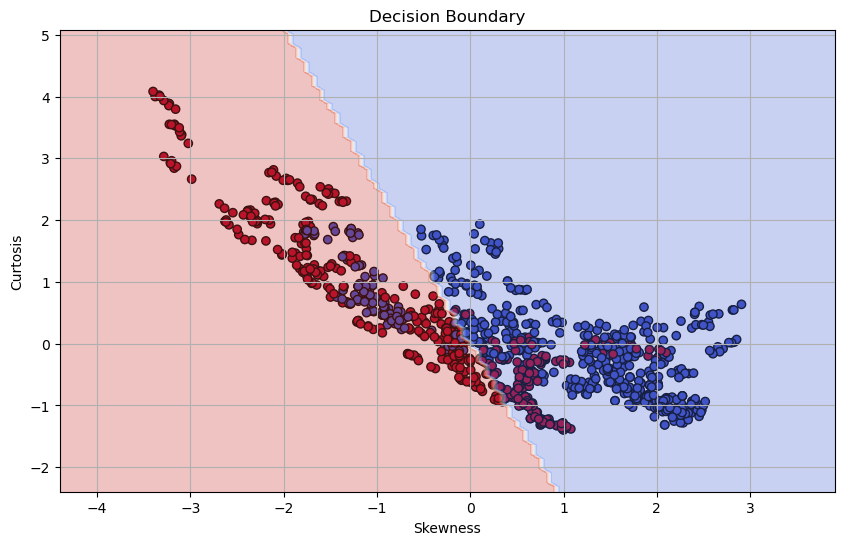

Training Accuracy: 0.7000911577028259


In [924]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, perceptron_2D, feature1, feature2):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of the data points, color-coded by class
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  

    # Calculate the decision boundary for each point in the grid
    Z = np.sign(perceptron_2D.weight[0] * xx + perceptron_2D.weight[1] * yy + perceptron_2D.bias)
    Z = Z.reshape(xx.shape) 

    # Plot the decision boundary as a filled contour
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Decision Boundary')
    plt.grid()
    plt.show()

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_train_2D, y_train, perceptron_2D, 'Skewness', 'Curtosis')
print("Training Accuracy:", accuracy_2D)


#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?
2. Can you find a pair of features that leads to better separation between the two
classes?

1. Each pair of features—skewness, kurtosis, entropy, and variance—can capture different aspects of the data distribution.Choosing different pairs can reveal distinct relationships between the features and the target class. By focusing on pairs of features, we are effectively reducing the dimensionality of the data. Some pairs might be less informative, impacting the overall model performance.
2. Variance and Curtosis gives more accurate results. This indicates that these features may have a stronger joint distribution concerning the target classes.

Training Accuracy: 0.8659981768459435


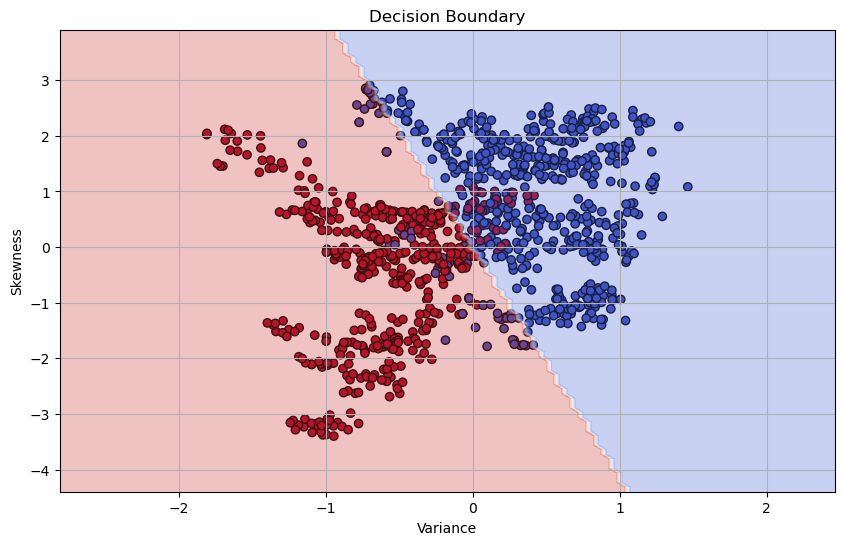

In [927]:
# Select two features (Variance and Skewness) for visualization
X_train_2D = X_train[:, [0, 1]]  # Training set with features at indices 0 (Variance) and 1 (Skewness)
X_test_2D = X_test[:, [0, 1]]  # Test set with the same selected features

perceptron_2D = Perceptron(init_weight, init_bias, learning_rate, epoch)
vector_2D, bias_2D = perceptron_2D.train_model(X_train_2D, y_train,False)

pred_2D = perceptron_2D.predict(X_train_2D)

# Calculate training accuracy for the 2D feature Perceptron
accuracy_2D = perceptron_2D.accuracy_calc(X_train_2D, y_train)
print("Training Accuracy:", accuracy_2D)

# Plot the decision boundary for the selected features
plot_decision_boundary(X_train_2D, y_train, perceptron_2D, 'Variance', 'Skewness')


Training Accuracy: 0.8249772105742935


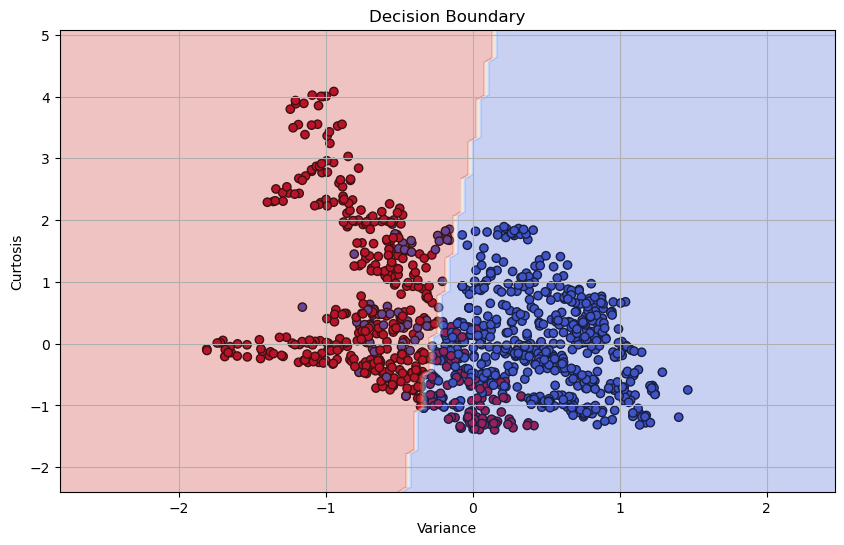

In [928]:
# Select two features (Variance and Curtosis) for visualization
X_train_2D = X_train[:, [0, 2]]  # Training set with features at indices 0 (Variance) and 2 (Curtosis)
X_test_2D = X_test[:, [0, 2]]  # Test set with the same selected features

perceptron_2D = Perceptron(init_weight, init_bias, learning_rate, epoch)
vector_2D, bias_2D = perceptron_2D.train_model(X_train_2D, y_train,False)

pred_2D = perceptron_2D.predict(X_train_2D)

# Calculate training accuracy for the 2D feature Perceptron
accuracy_2D = perceptron_2D.accuracy_calc(X_train_2D, y_train)
print("Training Accuracy:", accuracy_2D)

# Plot the decision boundary for the selected features
plot_decision_boundary(X_train_2D, y_train, perceptron_2D, 'Variance', 'Curtosis')


Training Accuracy: 0.8395624430264357


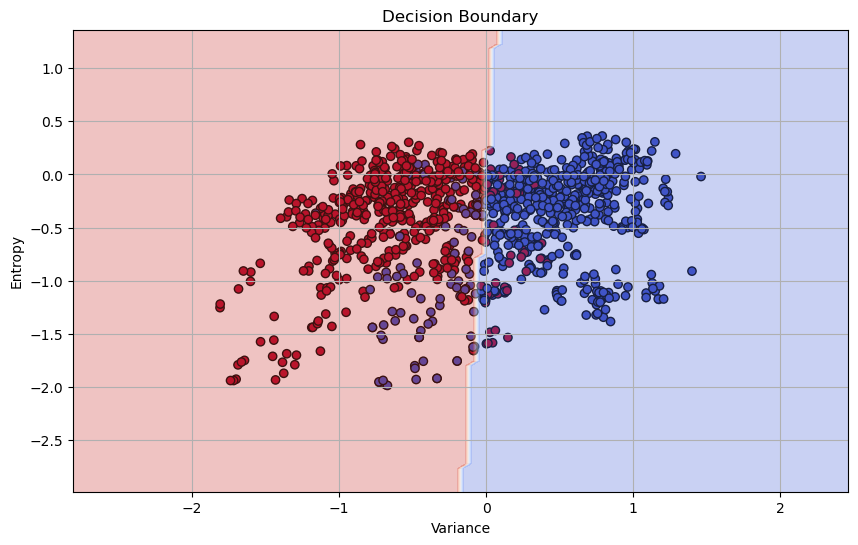

In [929]:
# Select two features (Variance and Entropy) for visualization
X_train_2D = X_train[:, [0, 3]]  # Training set with features at indices 0 (Variance) and 3 (Entropy)
X_test_2D = X_test[:, [0, 3]]  # Test set with the same selected features

perceptron_2D = Perceptron(init_weight, init_bias, learning_rate, epoch)
vector_2D, bias_2D = perceptron_2D.train_model(X_train_2D, y_train,False)

pred_2D = perceptron_2D.predict(X_train_2D)

# Calculate training accuracy for the 2D feature Perceptron
accuracy_2D = perceptron_2D.accuracy_calc(X_train_2D, y_train)
print("Training Accuracy:", accuracy_2D)

# Plot the decision boundary for the selected features
plot_decision_boundary(X_train_2D, y_train, perceptron_2D, 'Variance', 'Entropy')


Training Accuracy: 0.7839562443026435


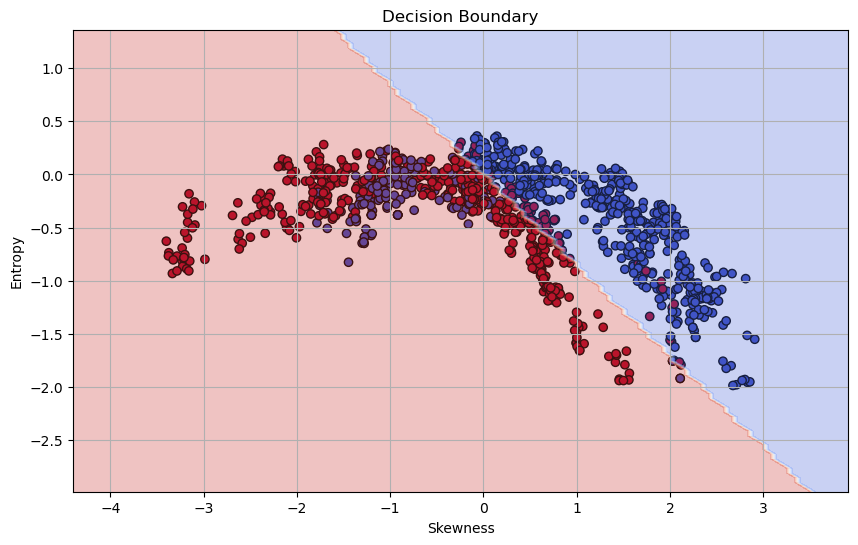

In [930]:
# Select two features (Skewness and Entropy) for visualization
X_train_2D = X_train[:, [1, 3]]  # Training set with features at indices 1 (Skewness) and 3 (Entropy)
X_test_2D = X_test[:, [1, 3]]  # Test set with the same selected features

perceptron_2D = Perceptron(init_weight, init_bias, learning_rate, epoch)
vector_2D, bias_2D = perceptron_2D.train_model(X_train_2D, y_train,False)

pred_2D = perceptron_2D.predict(X_train_2D)

# Calculate training accuracy for the 2D feature Perceptron
accuracy_2D = perceptron_2D.accuracy_calc(X_train_2D, y_train)
print("Training Accuracy:", accuracy_2D)

# Plot the decision boundary for the selected features
plot_decision_boundary(X_train_2D, y_train, perceptron_2D, 'Skewness', 'Entropy')


Training Accuracy: 0.48951686417502277


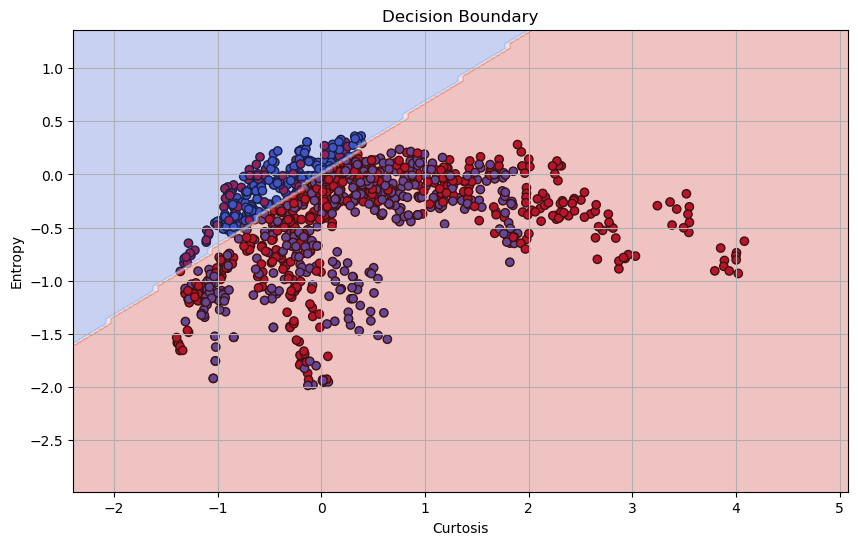

In [931]:
# Select two features (Curtosis and Entropy) for visualization
X_train_2D = X_train[:, [2, 3]]  # Training set with features at indices 2 (Curtosis) and 3 (Entropy)
X_test_2D = X_test[:, [2, 3]]  # Test set with the same selected features

perceptron_2D = Perceptron(init_weight, init_bias, learning_rate, epoch)
vector_2D, bias_2D = perceptron_2D.train_model(X_train_2D, y_train,False)

pred_2D = perceptron_2D.predict(X_train_2D)

# Calculate training accuracy for the 2D feature Perceptron
accuracy_2D = perceptron_2D.accuracy_calc(X_train_2D, y_train)
print("Training Accuracy:", accuracy_2D)

# Plot the decision boundary for the selected features
plot_decision_boundary(X_train_2D, y_train, perceptron_2D, 'Curtosis', 'Entropy')


#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

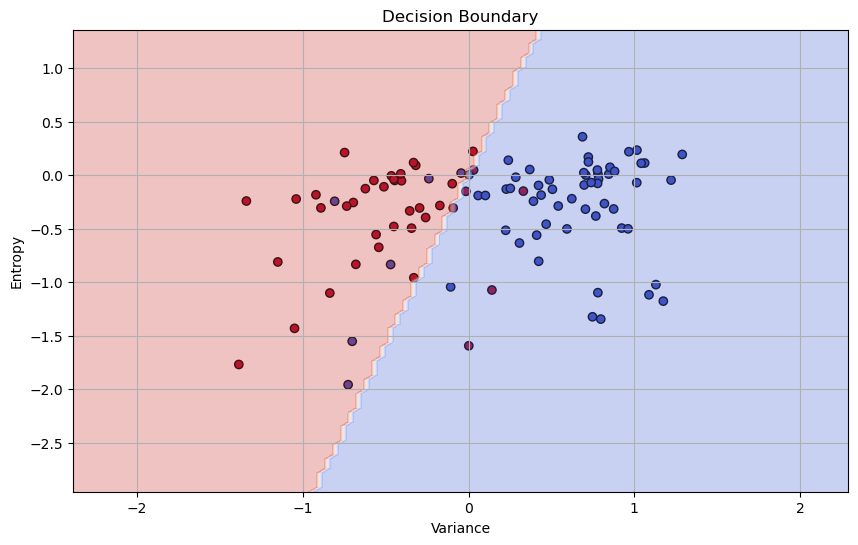

Training Accuracy with samples 0 to 100: 0.87


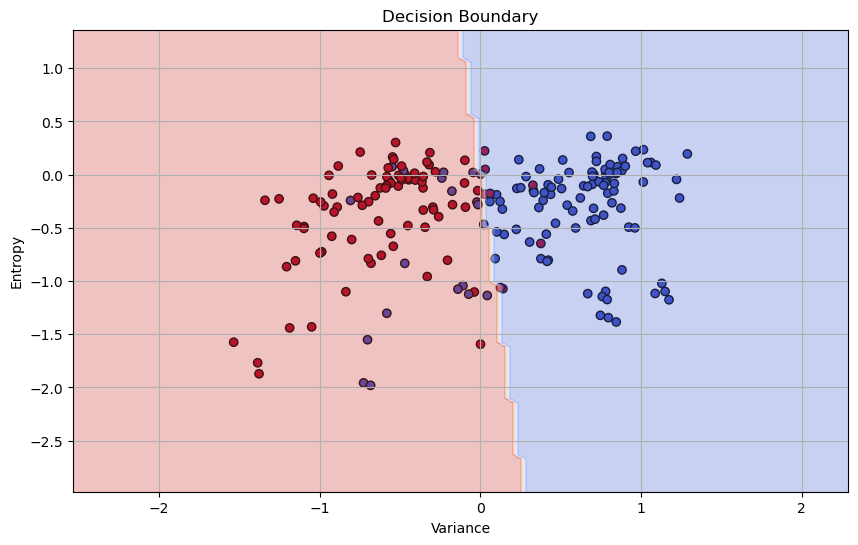

Training Accuracy with samples 100 to 200: 0.83


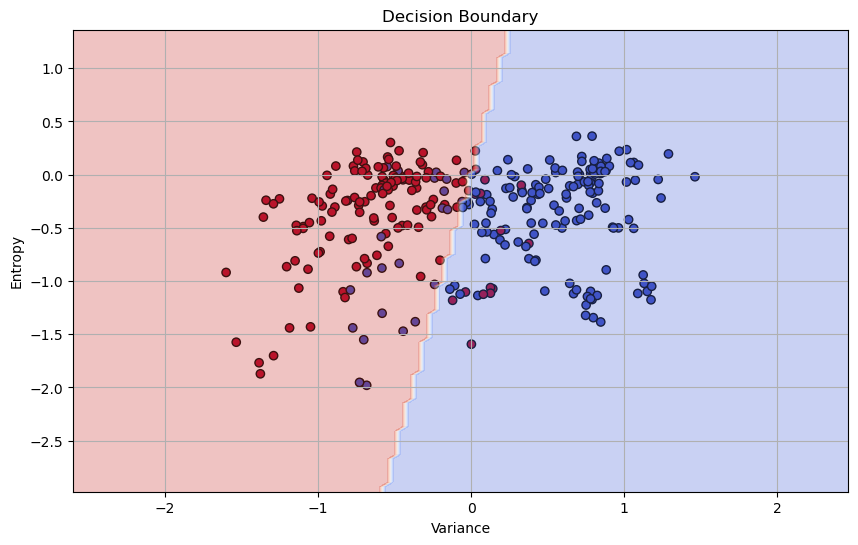

Training Accuracy with samples 200 to 300: 0.81


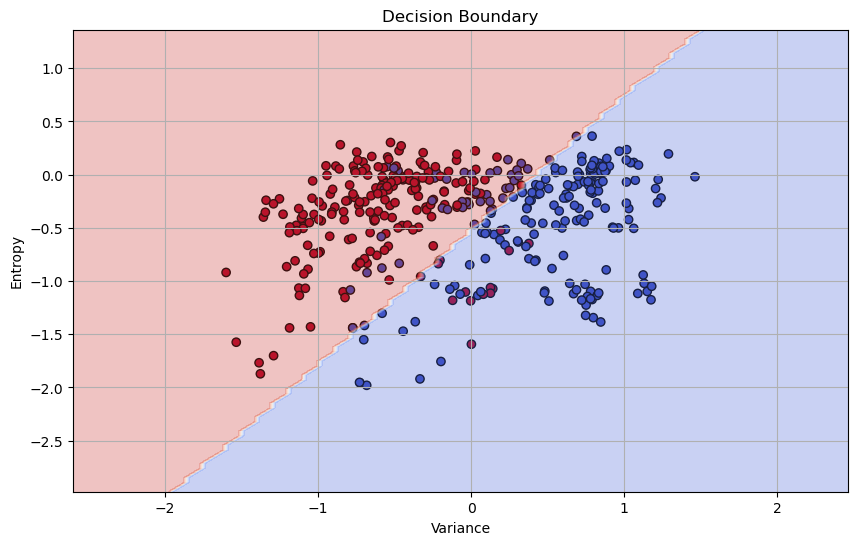

Training Accuracy with samples 300 to 400: 0.87


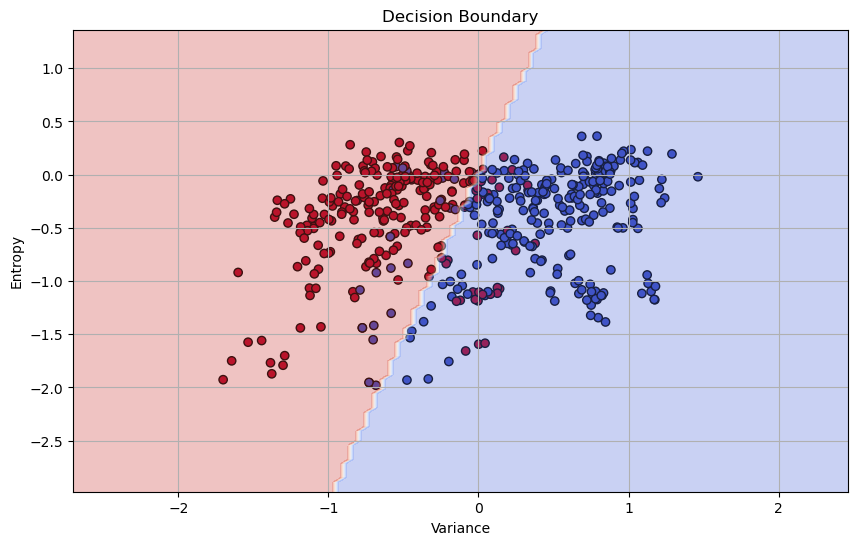

Training Accuracy with samples 400 to 500: 0.87


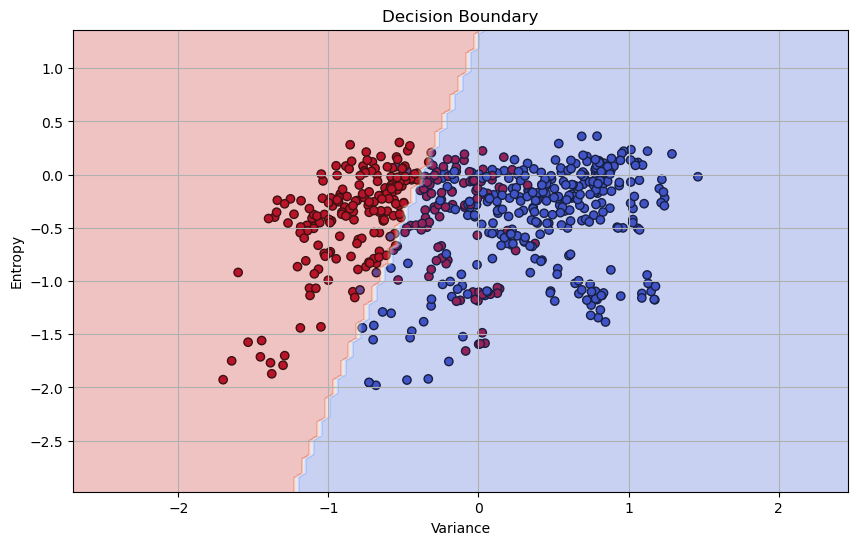

Training Accuracy with samples 500 to 600: 0.87


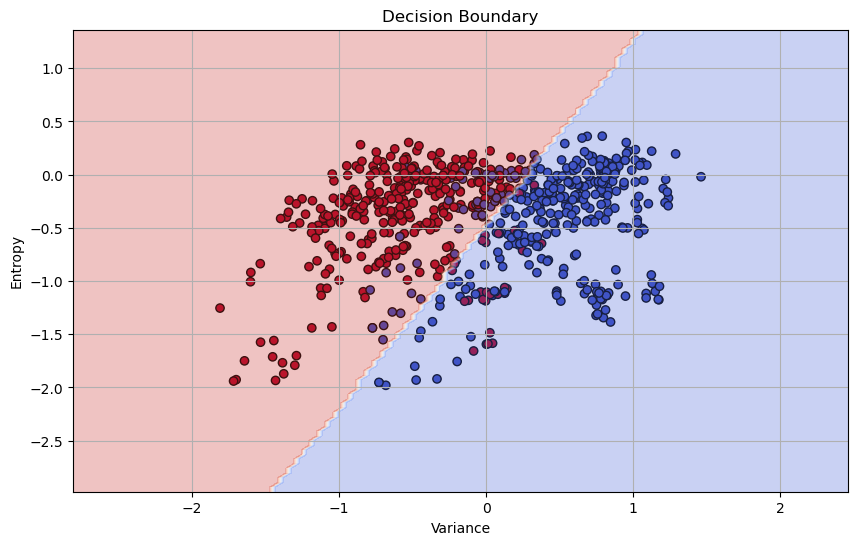

Training Accuracy with samples 600 to 700: 0.76


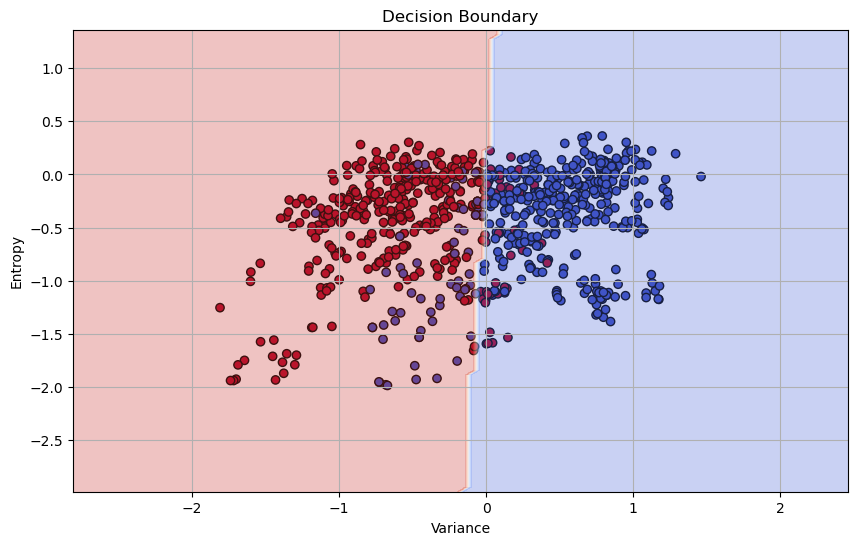

Training Accuracy with samples 700 to 800: 0.74


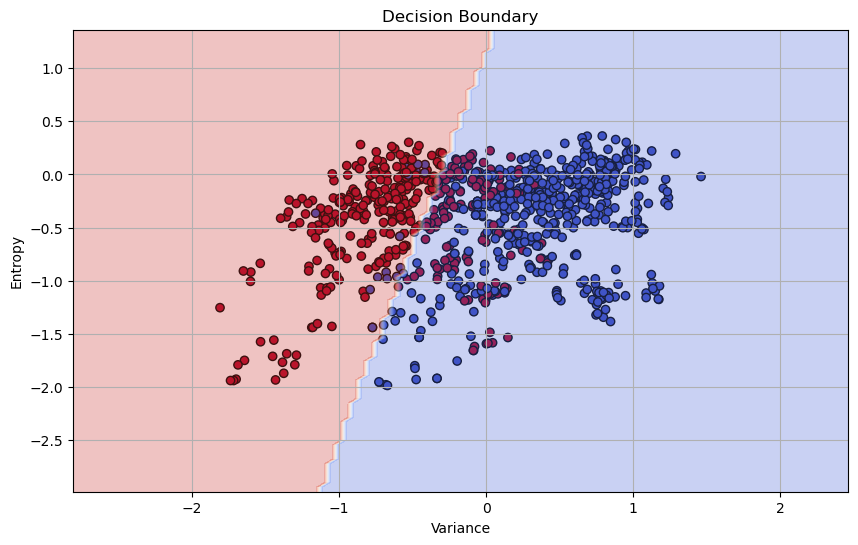

Training Accuracy with samples 800 to 900: 0.79


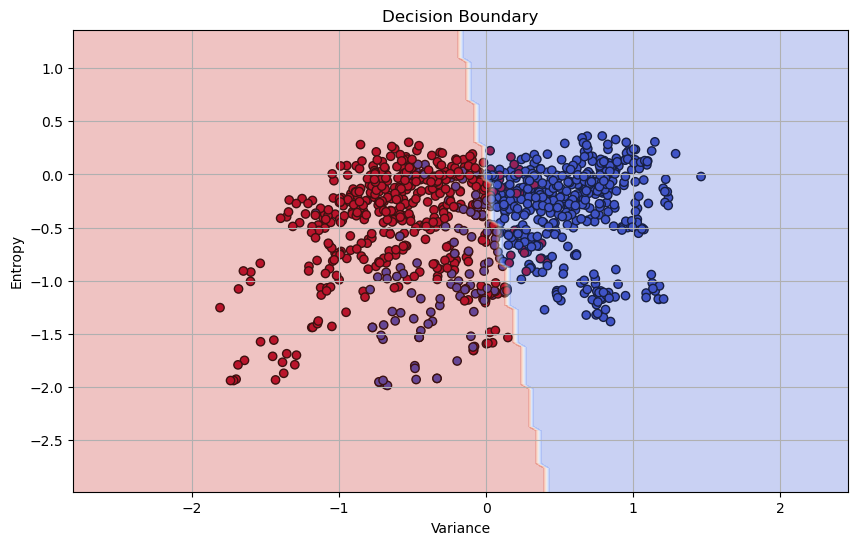

Training Accuracy with samples 900 to 1000: 0.81


In [934]:
initial_size = 100  # Start with 100 samples
increment_size = 100  # Incrementally add 100 samples each time
max_size = X_train_2D.shape[0]  # Total number of training samples

X_train_2D = X_train[:, [0, 3]]  # Select Variance and Entropy as features for visualization

# Initialize the Perceptron parameters
vector_2D = np.zeros(X_train_2D.shape[1]) 
bias_2D = 0  
learning_rate = 0.01  
epoch = 50  
perceptron_2D = Perceptron(vector_2D, bias_2D, learning_rate, epoch)

# Incrementally add data in non-overlapping blocks and visualize the decision boundary
for start in range(0, max_size, increment_size):
    end = start + increment_size
    if end > max_size:
        break  # Stop if we exceed the total number of samples
    
    X_subset = X_train_2D[start:end]  # Current subset of features
    y_subset = y_train[start:end]  # Current subset of labels

    # Data used for plotting up to the current increment
    X_subset_graph = X_train_2D[0:end]
    y_subset_graph = y_train[0:end]

    # Train the Perceptron on the current subset
    perceptron_2D.train_model(X_subset, y_subset,False)

    # Plot the decision boundary after each increment
    plot_decision_boundary(X_subset_graph, y_subset_graph, perceptron_2D, 'Variance', 'Entropy')
    
    # Print the training accuracy for the current subset of samples
    pred_2D = perceptron_2D.predict(X_subset)
    accuracy_2D = perceptron_2D.accuracy_calc(X_subset, y_subset)
    print(f"Training Accuracy with samples {start} to {end}:", accuracy_2D)


2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

This process shows the adaptability of the model as it seeks to minimize classification errors. Observing these adjustments also helps us to understand the convergence behavior and the potential limitations of the Perceptron in handling non-linearly separable data.

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Anwer the guiding
questions:
1. Why does the hyperplane change with different features or data points?
2. How does the decision boundary relate to the linearly separable nature of the data?

1. Different features represent various aspects of the data, and their influence on the hyperplane varies. Features that show higher variance or stronger correlations with the target class will significantly impact the hyperplane's orientation. For example, when a new informative feature is introduced, the hyperplane may adjust to align more closely with it, enhancing classification accuracy. Conversely, less relevant features may result in a less effective hyperplane. Perceptron algorithm learns by adjusting the hyperplane based on the training data. Each time it processes a data point, it makes a prediction and checks for correctness. If it misclassifies a point, it updates the weights according to the rule
2. The decision boundary's ability to separate classes directly reflects the linearly separable nature of the data. When data is linearly separable, a well-defined hyperplane can be established, leading to accurate predictions.In contrast, when data is not linearly separable, the inability to find an optimal decision boundary highlights the limitations of linear classifiers like the Perceptron. And the perceptron algorithm never converges in this case.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [940]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant (LD) projection direction."""
    
    num_0, num_1 = 0, 0
    sum_0 = np.zeros((X.shape[1],))  # Sum of samples for class 0
    sum_1 = np.zeros((X.shape[1],))  # Sum of samples for class 1
    
    # Calculate mean vectors for each class
    for i in range(X.shape[0]):
        if y[i] == 1:
            num_1 += 1
            sum_1 += X[i]
        elif y[i] == 0:
            num_0 += 1
            sum_0 += X[i]
            
    avg_0 = sum_0 / num_0  
    avg_1 = sum_1 / num_1  

    Sw = np.zeros((X.shape[1], X.shape[1]))

    # Compute within-class scatter matrix
    for i in range(X.shape[0]):
        if y[i] == 1:
            Sw += np.outer(X[i] - avg_1, X[i] - avg_1)  # Scatter for class 1
        elif y[i] == 0:
            Sw += np.outer(X[i] - avg_0, X[i] - avg_0)  # Scatter for class 0

    # Compute the inverse of the within-class scatter matrix
    Sw_inv = inv(Sw)

    # Calculate the Fisher LD projection vector
    projection_vector = Sw_inv.dot(avg_1 - avg_0)

    # Normalize the projection vector to unit length
    norm = np.linalg.norm(projection_vector)
    if norm != 0:
        projection_vector = projection_vector / norm

    return projection_vector

def project_data(X, direction):
    """Project data onto the Fisher LD direction."""
    return X.dot(direction)


In [941]:
# Compute the Fisher Linear Discriminant (LD) projection direction using the training data
direction = fisher_ld_projection(X_train, y_train)

# Project the training data onto the Fisher LD direction for dimensionality reduction
projected_data = project_data(X_train, direction)


While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

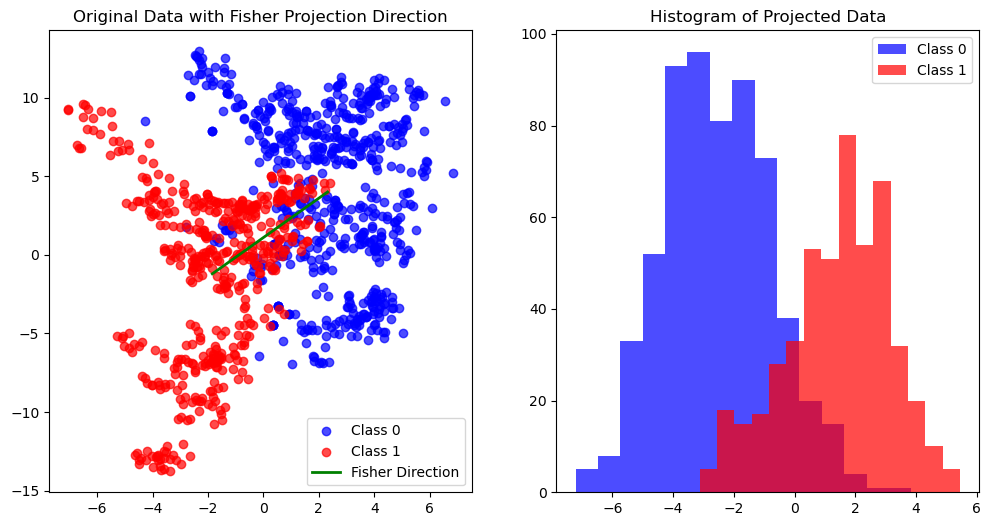

In [943]:

array_2D = X_train_fisher[:, [0, 3]]  # Select features (Variance and Entropy) for Fisher LD
direction_2D = fisher_ld_projection(array_2D, y_train)  # Compute Fisher LD projection direction
projected_data_2D = project_data(array_2D, direction_2D)  # Project data onto the Fisher LD direction

# Split data into two classes based on y_train labels
class_0 = X_train_fisher[y_train == 0]  # Samples of class 0
class_1 = X_train_fisher[y_train == 1]  # Samples of class 1

# Plot original data and Fisher LD projections
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Original data with Fisher projection direction line
ax1.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0', alpha=0.7)
ax1.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1', alpha=0.7)
mean_0 = np.mean(class_0, axis=0)  
mean_1 = np.mean(class_1, axis=0)  
ax1.plot([mean_0[0], mean_1[0]], [mean_0[1], mean_1[1]], 'g-', linewidth=2, label='Fisher Direction')  # Projection line
ax1.legend()
ax1.set_title("Original Data with Fisher Projection Direction")

# Right plot: Histogram of projected data along the Fisher LD direction
proj_class_0 = projected_data_2D[y_train == 0]  # Projected values for class 0
proj_class_1 = projected_data_2D[y_train == 1]  # Projected values for class 1
ax2.hist(proj_class_0, bins=15, color='blue', alpha=0.7, label='Class 0')
ax2.hist(proj_class_1, bins=15, color='red', alpha=0.7, label='Class 1')
ax2.legend()
ax2.set_title("Histogram of Projected Data")

plt.show()


Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

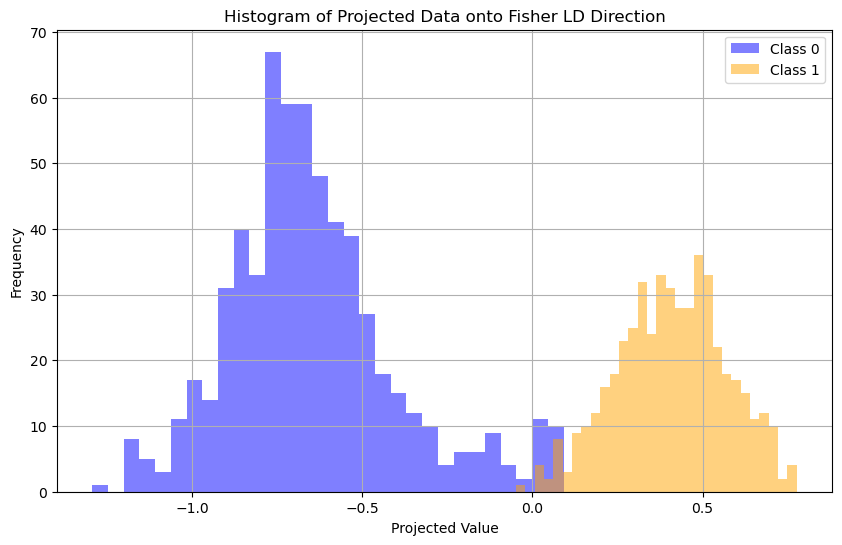

In [945]:
# Plot the Fisher's LD with 4 features
# Plot the histogram of the projected data along the Fisher Linear Discriminant (LD) direction
plt.figure(figsize=(10, 6))

# Histogram for projected data of Class 0
plt.hist(projected_data[y_train == 0], bins=30, alpha=0.5, label='Class 0', color='blue')

# Histogram for projected data of Class 1
plt.hist(projected_data[y_train == 1], bins=30, alpha=0.5, label='Class 1', color='orange')

# Add plot title and labels
plt.title('Histogram of Projected Data onto Fisher LD Direction')
plt.xlabel('Projected Value')
plt.ylabel('Frequency')
plt.legend()  # Add legend to differentiate classes
plt.grid()  # Add grid for readability
plt.show()


Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?
2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?

1. Fisher's LD effectively separates the two classes in the 1D projected space. The two distributions are clearly separated with minimal overlap, indicating good class separability. The data points from class 0 are mostly distributed around -0.75, while data points from class 1 are distributed around 0.5. This suggests that Fisher’s LD has successfully identified a direction that maximizes the difference between the means of the two classes.
2. The class distributions in the 2D space are not linearly separable, meaning you cannot draw a straight line to perfectly separate the two classes. This makes it difficult for a linear classifier like the Perceptron to perform well. In contrast, the 1D Fisher's LD projection is nearly linearly separable. This is because the projection has effectively reduced the dimensionality of the data while emphasizing the separation between the classes. This makes it easier for a linear classifier to distinguish between the two classes.

### SUMMARY
The Perceptron model is straightforward to implement and provides a foundational understanding of linear classifiers. The decision boundary is easy to interpret, especially in lower-dimensional spaces.  The Perceptron model updates its weights with every misclassified sample. If there are outliers, these samples can heavily influence the decision boundary, it makes the model unstable. In this assignment, the data was not linearly separable, meaning that there is no single straight line or hyperplane that can perfectly separate the two classes. This causes the Perceptron to fail to converge. With Fisher’s LD, the data becomes almost linearly separable in the 1D projected space, addressing the convergence issues faced by the Perceptron. If the Perceptron is trained on this projected 1D space, it would likely converge more reliably, as Fisher’s LD has transformed the data to a form that is closer to linear separability. Although Fisher’s LD can enhance linear separability, it is still limited to a 1D projection. It may not work for more complex data.